# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Inicialización](#inicializacion) 
* [Etapa 2. Cargar los datos](#cargar)
* [Etapa 3. Preparar los datos](#preparar)
    * [Hypotheses](#hypotheses)
     * [Corregir datos](#corregir_hypotheses)
    * [Orders](#orders)
     * [Corregir datos](#corregir_orders)
    * [Visits](#visits)
     * [Corregir datos](#corregir_visits)
* [Etapa 4. Priorizar hipótesis](#priorizar)
    * [Framework Impacto, confianza, esfuerzo (ICE)](#ice)
    * [Framework alcance, Impacto, confianza, esfuerzo (RICE](#rice) ) 
    * [Conclusiones](#conclusiones)
* [Etapa 5. Análisis de test A/B ](#analizar)
    * [Ingresos acumulados por día y grupo de prueba A/B ](#1)
    * [Tamaño promedio de la compra](#2)
    * [Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A ](#3)
    * [Tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas](#4)
    * [Gráfico de dispersión del número de pedidos por usuario](#5)
    * [Calculo de percentiles 95 y 99 para el número de pedidos por usuario](#6)
    * [Gráfico de dispersión de los precios de los pedidos](#7)
    * [Calculo de percentiles 95 y 99 de los precios de los pedidos](#8)
        * [Conclusiones](#8-1)
        * [Cantidad de usuarios anómalos](#8-2)
    * [Significancia estadística de la diferencia en la conversión entre los grupos con los datos brutos](#9)
    * [Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos con los datos brutos](#10)
    * [Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados ](#11)
    * [Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos con los datos filtrados](#12)
* [Conclusión general](#general)

# ¿Cómo aumentar los ingresos? <a id='intro'></a>

Eres analista en una gran tienda en línea. Junto con el departamento de marketing
has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Esta investigación tiene como propósito determinar si alguna de las hipótesis ayudan a aumentar los ingresos de la tienda en línea, para así brindar las mejores recomendaciones al departamento de marketing.

La información con la que se cuenta para el estudio son los datos de las hipótesis, tales como, alcance, impacto, confianza y recuersos, también se cuenta con un datasets que contiene la información sobre las compras realizadas por los clientes y el grupo al que pertenece en el test A/B y por último el datasets de las visitas de los clientes donde se especifica también el grupo al que pertenece.

Se van a tratar los valores ausentes, duplicados, corregir tipos de datos y priorizar las hipótesis para luego analizar los resultados del test A/B y trazar gráficos que permitan determinar las conclusiones de estudio y redactar las recomendaciones al equipo de marketing de la compañía. 

## Inicialización <a id='inicializacion'></a>

In [1]:
# Cargar todas las librerías 

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Cargar los datos <a id='cargar'></a>

In [2]:
hypothesis= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders= pd.read_csv('/datasets/orders_us.csv')
visits= pd.read_csv('/datasets/visits_us.csv')

## Preparar los datos <a id='preparar'></a>

### Hypotheses<a id='hypotheses'></a>

In [3]:
# Información general/resumen sobre el DataFrame
hypothesis.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [4]:
# Comprobar si hay duplicados
print(hypothesis.duplicated().sum())
duplicated_hypothesis= hypothesis[hypothesis.duplicated()]

0


In [5]:
# Muestra de los datos
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


El dataset hypothesis contiene los siguientes campos:

- `Hypothesis` — breves descripciones de las hipótesis
- `Reach ` — alcance del usuario, en una escala del uno a diez        
- `Impact`  — impacto en los usuarios, en una escala del uno al diez  
- `Confidence ` — confianza en la hipótesis, en una escala del uno al diez       
- `Effort`  — os recursos necesarios para probar una hipótesis, en una escala del
uno al diez. Cuanto mayor sea el valor Effort , más recursos requiere la prueba.

Tenemos un conjunto de datos conformado por 5 columnas y 9 filas, no se necesita ajustar tipos de datos, no se encontraron valores ausentes ni duplicados.
Se ajustarán los nombres de las columnas para que solo contengan letras minúsculas.

#### Corregir datos hypothesis<a id='corregir_hypothesis'></a>

In [6]:
# Cambiar nombre de las columnas

hypothesis.columns=['hypothesis','reach','impact','confidence','effort']

In [7]:
# Comprobar la tabla

hypothesis.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


### Orders<a id='orders'></a>

In [8]:
# Información general/resumen sobre el DataFrame
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [9]:
# Comprobar si hay duplicados

print(orders.duplicated().sum())
duplicated_orders= orders[orders.duplicated()]

0


In [10]:
# Muestra de los datos
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
# Verificar máximo y mínimo de date  

print(orders['date'].min())
print(orders['date'].max())

2019-08-01
2019-08-31


In [12]:
#Verificar duplicados en visitorId y group

orders_index= orders[ orders['visitorId'].duplicated()][['visitorId','group']].duplicated()

In [13]:
ordersA= orders[orders['group']=='A'][['visitorId']]
ordersB= orders[orders['group']=='B'][['visitorId']]

In [15]:
ordersA= set(ordersA['visitorId']) 
ordersB= set(ordersB['visitorId'])

In [17]:
data_intersect = ordersA.intersection(ordersB) 
data_intersect

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

In [18]:
#Verificar la distribución de group

orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

**El dataset orders contiene los siguientes campos:**

- `transactionId` — identificador del pedido 
- `visitorId` — — identificador del usuario que realizó el pedido        
- `date`  — fecha del pedido   
- `revenue` — ingresos del pedido      
- `group`  — el grupo del test A/B al que pertenece el usuario

Tenemos un conjunto de datos conformado por 5 columnas y 1197 filas, no se encontraron valores ausentes ni filas duplicadas, verificando la distribución de la columna group se puede notar que tiene solo dos valores A con 557 entradas y B con 640 entradas.

Se identificaron 58 visitorId que fueron parte tanto del grupo A como del B, los cuales se van a eliminar de los datos para no afectar el análisis de la prueba A/B.

Se necesita ajustar el tipo de datos de las columnas date al tipo datetime.

Verificando el valor máximo y mínimo de la columna date se determinó que el conjunto de datos pertenece al intervalo de fechas comprendido entre el 2019-08-01 y el 2019-08-31.


#### Corregir datos orders<a id='corregir_orders'></a>

In [19]:
# cambiar tipos de datos

orders['date'] = orders['date'].map(
    lambda x:dt.datetime.strptime(x,'%Y-%m-%d')
)


In [20]:
# Eliminar individuos que participaron en ambos grupos

orders = orders[~orders['visitorId'].isin(data_intersect)]

In [21]:
# Comprobar información general de la tabla orders filtrada

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [22]:
# Muestra de los datos

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


### Visits<a id='visits'></a>

In [23]:
# Información general/resumen sobre el DataFrame

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [24]:
# Comprobar si hay duplicados

print(visits.duplicated().sum())
duplicated_visits= visits[visits.duplicated()]

0


In [25]:
# Muestra de los datos
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [26]:
# Verificar máximo y mínimo de date  

print(visits['date'].min())
print(visits['date'].max())

2019-08-01
2019-08-31


In [27]:
#Verificar la distribución de Source group

visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

El dataset visits contiene los siguientes campos:

- `date` — al día 
- `group` — el grupo del test A/B        
- `visits`  — el número de visitas en la fecha especificada para el grupo de test A/B
especificado   

Tenemos un conjunto de datos conformado por 3 columnas y 62 filas, no se encontraron valores ausentes ni duplicados, verificando la distribución de la columna group se puede notar que tiene solo dos valores A con 31 entradas y B con 31 entradas.

Se necesita ajustar el tipo de datos de las columnas date al tipo datetime.

Verificando el valor máximo y mínimo de la columna date se determinó que el conjunto de datos pertenece al intervalo de fechas comprendido entre el 2019-08-01 y el 2019-08-31.

#### Corregir datos visits<a id='corregir_visits'></a>

In [28]:
# cambiar tipos de datos

visits['date'] = visits['date'].map(
    lambda x:dt.datetime.strptime(x,'%Y-%m-%d')
)


In [29]:
# Comprobar información general de la tabla

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


## Priorizar hipótesis <a id='priorizar'></a>

In [30]:
hypothesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Framework Impacto, confianza, esfuerzo (ICE) <a id='ice'></a>

In [31]:
# Framework Impacto, confianza, esfuerzo (ICE) 

hypothesis['ICE']= (hypothesis['impact'] * hypothesis['confidence'] ) / hypothesis['effort']
hypothesis_ice= hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
hypothesis_ice

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


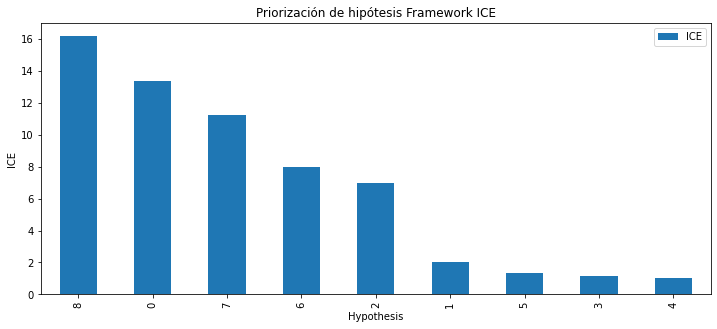

In [32]:
hypothesis_ice.plot(kind='bar',title= 'Priorización de hipótesis Framework ICE',
                               figsize=(12,5))
plt.ylabel('ICE')
plt.xlabel('Hypothesis')
plt.show()

El ICE presenta que las hipótesis 8, 0, 7, 6 y 2 son las más prometedoras.

### Framework alcance, Impacto, confianza, esfuerzo (RICE)  <a id='rice'></a>

In [33]:
# Framework alcance, Impacto, confianza, esfuerzo (RICE) 

hypothesis['RICE']= (hypothesis['reach'] * hypothesis['confidence']) / hypothesis['effort']
hypothesis_rice= hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)
hypothesis_rice

,hypothesis,RICE
2,Add product recommendation blocks to the store...,18.666667
7,Add a subscription form to all the main pages....,16.000000
6,Show banners with current offers and sales on ...,13.333333
0,Add two new channels for attracting traffic. T...,4.000000
3,Change the category structure. This will incre...,3.000000
4,Change the background color on the main page. ...,3.000000
5,Add a customer review page. This will increase...,2.000000
8,Launch a promotion that gives users discounts ...,1.800000
1,Launch your own delivery service. This will sh...,0.800000


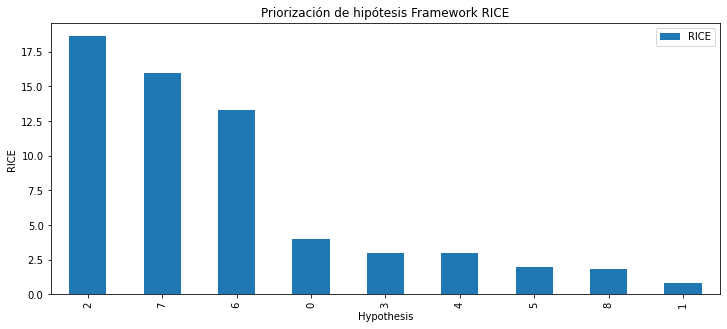

In [34]:
hypothesis_rice.plot(kind='bar',title= 'Priorización de hipótesis Framework RICE',
                               figsize=(12,5))
plt.ylabel('RICE')
plt.xlabel('Hypothesis')
plt.show()

En el RICE las hipótesis más prometedoras son la 2, 7 y 6 ya que las siguientes están bastante por debajo de estas. 

### Conclusiones <a id='conclusiones'></a>

- Comparando las posiciones relativas del RICE con respecto al ICE se puede observar un cambio, ya la hipótesis 8 pasó del primer lugar al penúltimo lugar, esto se debe a que su parámetro reach es 1 mientras que las otras hipótesis tienen valores más altos, la hipótesis 0 pasó del segundo lugar al cuarto lugar muy por debajo del tercer lugar también se debe a que su valor reach es de solo 3. 

- Las hipótesis más prometedoras que se encuentran en los primero lugares tanto en RICE como en ICE son: la número 2, 7 y 6.  

## Análisis de test A/B <a id='analisis'></a>

In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


### Ingresos acumulados por día y grupo de prueba A/B <a id='1'></a>

In [36]:
# Valores únicos 

datesGroups= orders[['date','group']].drop_duplicates()


In [37]:
# DataFrame con datos acumulados agregados sobre los pedidos

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({'date': 'max','group': 'max','transactionId': pd.Series.nunique,'visitorId': pd.Series.nunique,'revenue': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [38]:
# DataFrame con datos acumulados agregados sobre los visitantes

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [39]:
# DataFrame fusionado

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])
cumulativeData.columns= ['date','group','orders','buyers','revenue','visits']

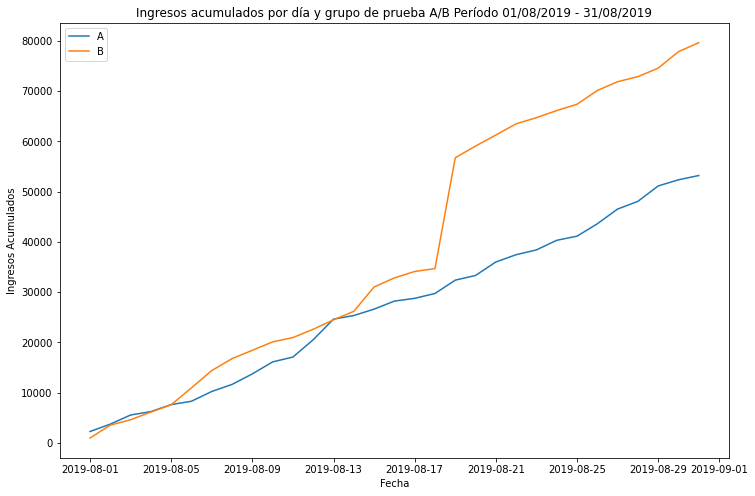

In [40]:
# Ingresos acumulados por día y grupo de prueba A/B

cumulativeRevenueA= cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

cumulativeRevenueB= cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label='B')
plt.title('Ingresos acumulados por día y grupo de prueba A/B Período 01/08/2019 - 31/08/2019')
plt.ylabel('Ingresos Acumulados')
plt.xlabel('Fecha')

plt.legend()

Los ingresos aumentan constantemente durante toda la prueba, hasta la mitad de la prueba los grupos estaban parejos pero a partir de ahí el grupo B comienza a aumentar con un pico muy pronunciado, esto puede implicar un aumento en el número de pedidos o pedidos muy caros en la muestra. Las metricas acumuladas del grupo B a partir de la mitad de la prueba son consistentemente mas altas que las del grupo A. 

### Tamaño promedio de la compra <a id='2'></a>

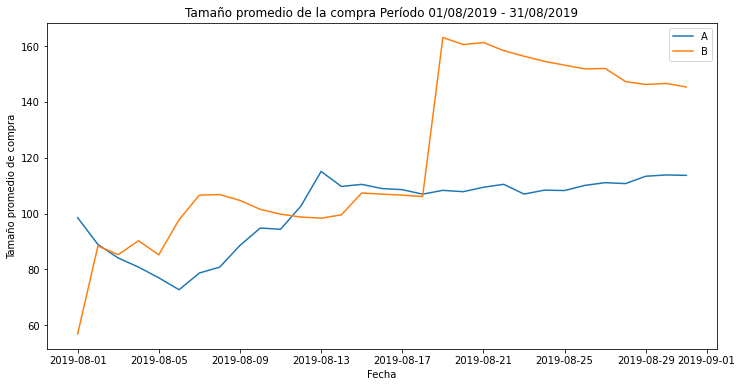

In [41]:
# Tamaño promedio de la compra

plt.rcParams["figure.figsize"] = (12,6)
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'] , label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'] , label='B')
plt.title('Tamaño promedio de la compra Período 01/08/2019 - 31/08/2019')
plt.ylabel('Tamaño promedio de compra')
plt.xlabel('Fecha')
plt.legend()

El tamaño promedio de compra del Grupo A fluctúa bastante hasta la mitad de la prueba con varios picos hacia abajo y hacia arriba en varios puntos, luego de la mitad de la prueba comienza a estabilizarse mientras que el tamaño promedio del grupo B también tienen muchas fluctuaciones hacia abajo y hacia arriba con un pico muy importante después del 17 de agosto luego empieza a caer y comienza a estabilizarse para el final de la prueba. Se analizarán los valores atípicos para determinar el verdadero tamaño promedio. 

### Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A <a id='3'></a>

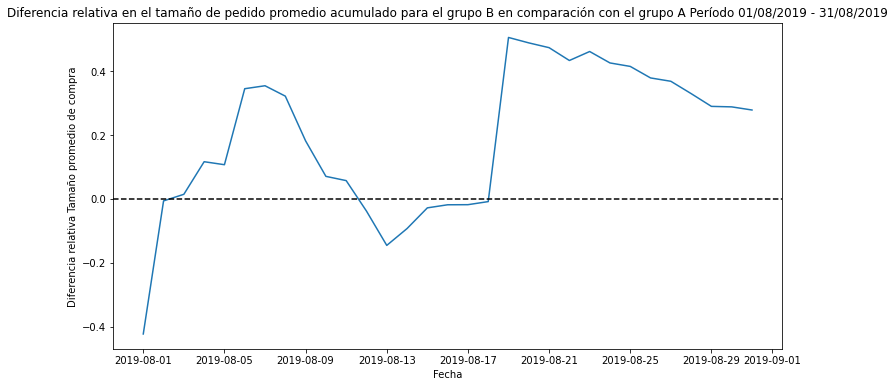

In [42]:
# Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

mergedCumulativeRevenue= cumulativeRevenueA.merge(cumulativeRevenueB, left_on= 'date', right_on='date', how='left', suffixes=['A','B'])
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A Período 01/08/2019 - 31/08/2019')
plt.ylabel('Diferencia relativa Tamaño promedio de compra')
plt.xlabel('Fecha')
plt.axhline(y=0, color='black',linestyle='--')

En varios puntos, la diferencia entre los segmentos aumenta considerablemente, definitivamente hay algunas compras muy grandes y valores atípicos que están afectando los resultados.

### Tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas<a id='4'></a>

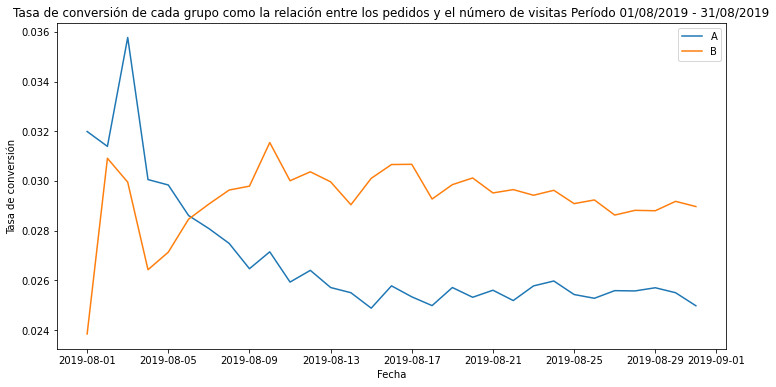

In [43]:
# Tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas

cumulativeData['conversion']= cumulativeData['orders'] / cumulativeData['visits'] 

cumulativeDataA= cumulativeData[cumulativeData['group']== 'A']
cumulativeDataB= cumulativeData[cumulativeData['group']== 'B']

plt.rcParams["figure.figsize"] = (12,6)
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'], label='B')
plt.title('Tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas Período 01/08/2019 - 31/08/2019')
plt.ylabel('Tasa de conversión')
plt.xlabel('Fecha')
plt.legend()

Ambos grupos tienen una gran cantidad de picos altos y bajos durante toda la prueba, aunque el grupo A comienza por encima del grupo B a apenas unos días de iniciada la prueba empiza a caer y se mantiene siempre por debajo del grupo B. 

### Gráfico de dispersión del número de pedidos por usuario<a id='5'></a>

In [44]:
# Gráfico de dispersión del número de pedidos por usuario

ordersByUsers=(
    orders.drop(['group','revenue','date'], axis= 1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns=['userId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head()

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Text(0.5, 0, 'Usuarios')

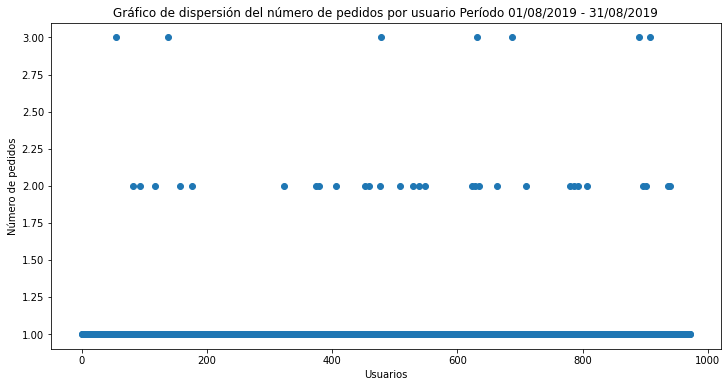

In [45]:
x_values= pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Gráfico de dispersión del número de pedidos por usuario Período 01/08/2019 - 31/08/2019')
plt.ylabel('Número de pedidos')
plt.xlabel('Usuarios')

La mayoría de los usuarios hicieron 1 pedido, después, tenemos algunos con 2 pedidos y luego algunos otros posos con 3 pedidos, hay que verificar cuantos se pueden considerar anómalos. 

### Calculo de percentiles 95 y 99 para el número de pedidos por usuario<a id='6'></a>

In [46]:
# Calculo de percentiles 95 y 99 para el número de pedidos por usuario

print(np.percentile(ordersByUsers['orders'], [95,99]))

[1. 2.]


No más del 5% de los usuarios realizaron más de 1 pedido y no más del 1% de los usuarios realizó más de 2 pedidos.
Por lo tanto es razonable establecer 2 pedido por usuario como límite superior y eliminar el 1% de los usuarios con número mayor de pedidos. 

### Gráfico de dispersión de los precios de los pedidos<a id='7'></a>

Text(0.5, 0, 'Usuarios')

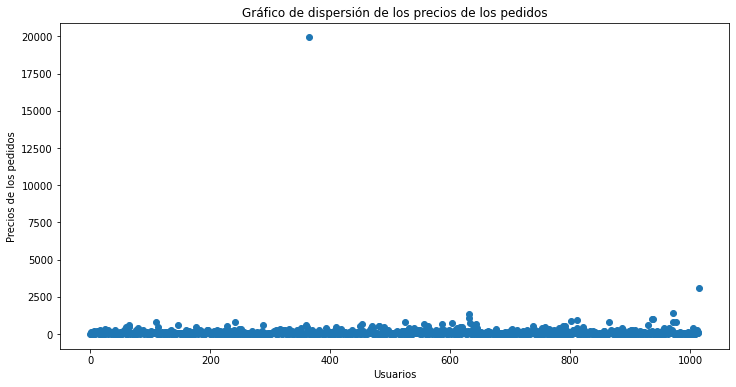

In [47]:
# Gráfico de dispersión de los precios de los pedidos 

x_values= pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Gráfico de dispersión de los precios de los pedidos')
plt.ylabel('Precios de los pedidos')
plt.xlabel('Usuarios')

Hay algún pedido muy grande que sin duda es anómalo, luego no se aprecia claramente a partir de cuanto los pedidos se pueden considerar anómalos. Se procede al cálculo de los percentiles para determinarlo.

### Calculo de percentiles 95 y 99 de los precios de los pedidos<a id='8'></a>

In [48]:
# Calculo de percentiles 95 y 99 de los precios de los pedidos

print(np.percentile(orders['revenue'], [95,99]))

[414.275 830.3  ]


No más del 5% de los pedidos cuestan mas de 414 y no más del 1% cuestan más de 830. Tomando en cuenta la gráfica de dispersión es razonable establecer 830 como límite superior y eliminar el 1% de los usuarios con pedidos más altos. 

#### Conclusiones<a id='8-1'></a>

Se definen como datos anómalos a aquellos que realizaron más de 2 pedidos o un pedido mayor a 830$.

#### Cantidad de usuarios anómalos<a id='8-2'></a>

In [49]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']


usersWithManyOrders = ordersByUsersA[ordersByUsersA['orders'] > 2]['userId']
usersWithExpensiveOrders = orders[orders['revenue'] > 830]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099     148427295
58       611059232
949      887908475
744      888512513
1103    1164614297
dtype: int64
(17,)


En total tenemos 17 usuario anómalos.

### Significancia estadística de la diferencia en la conversión entre los grupos con los datos brutos<a id='9'></a>

In [50]:
# significancia estadística de la diferencia en la conversión entre los grupos con los datos brutos

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group'] =='B']['revenue']) [1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.862
0.160


El valor p de los datos sin procesar es notablemente superior a 0.05 por lo que no hay motivos para rechazar la hipótesis nula pero la ganancia relativa del grupo B es del 16 %. 

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos con los datos brutos<a id='10'></a>

In [51]:
# significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1))


0.862
0.278


El valor p es notablemente superior a 0.05 por lo tanto no hay motivos para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos no obstante el tamaño promedio de pedido para el grupo B es mucho más grande que para el grupo A.

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados <a id='11'></a>

In [52]:
# Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados 

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])) 
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.005
0.205


El valor p disminuyó y es menor a 0.05 por lo que tenemos evidencia para rechazar la hipótesis nula y la ganancia relativa del grupo B es de 20.5 %, por lo tanto las anomalías estaban afectando los resultados.

### significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos con los datos filtrados <a id='12'></a>

In [53]:
# significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos con los datos filtrados

print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print('{0:.3f}'.format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.917
-0.010


El valor p aumentó aún más y sigue siendo muy superior a 0.05 por lo tanto no hay motivos para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos, mientras el tamaño promedio de pedido para el grupo B es ligeramente menor que para el grupo A. Sin embargo también podemos concluir que las anomalías estaban afectando los resultados.

## Conclusión general <a id='general'></a>

El estudio se basó en el análisis de tres Datasets, que contenían información sobre las hipótesis, las compras y las visitas realizas por los usuarios, los datos presentaron algunos problemas que fueron resueltos, sin embargo ninguno de los Datasets tenía valores ausentes, ni duplicados, se necesitó ajustar el tipo de dato de las columnas date tanto en orders como en visits al tipo datetime, se verificaron las fechas en orders y visits y en ambos datasets el intervalo de fecha conincidía entre el 2019-08-01 al 2019-08-31 mientras que en el datasets hypothesis se ajustaron los nombres de las columnas para que solo contengan letras mínusculas.

Se identificaron 58 visitorId visitorId que fueron parte tanto del grupo A como del B, las ordenes con dichos usuarios fueron eliminados de los datos para que no afectaran el análisis de la prueba A/B.

**Se aplicaron los Frameworks ICE y RICE para determinar la prioridad de las hipótesis y se determinó lo siguiente:**

Hipótesis estudiadas:

0- Agregar dos nuevos canales para atraer tráfico.

1- Lanzar tu propio servicio de entrega. 

2- Agregar bloques de recomendación de productos a la tienda

3- Cambiar la estructura de categorías.

4- Cambiar el color de fondo en la página principal

5- Agregar una página de revisión del cliente

6- Mostrar banners con ofertas y rebajas actuales

7- Añadir un formulario de suscripción a todas las páginas principales

8- Lanzar una promoción que ofrezca descuentos a los usuarios

- Como resultados del Framework Impacto, confianza, esfuerzo (ICE) se determinó que las hipótesis más prometedoras son la 8, 0, 7, 6 y 2.

- El Framework alcance, Impacto, confianza, esfuerzo (RICE) determinó que las más prometedoras son la número 2, 7 y 6. 

- Comparando las posiciones relativas del RICE con respecto al ICE se puede observar un cambio, ya la hipótesis 8 pasó del primer lugar al penúltimo lugar, esto se debe a que su parámetro reach es 1 mientras que las otras hipótesis tienen valores más altos, la hipótesis 0 pasó del segundo lugar al cuarto lugar muy por debajo del tercer lugar también se debe a que su valor reach es de solo 3. 

- Las hipótesis más prometedoras que se encuentran en los primero lugares tanto en RICE como en ICE son: la número 2, 7 y 6.

**Resultados Test A/B**

Datos sin filtrar:

- Los ingresos aumentan constantemente durante toda la prueba, hasta la mitad de la prueba los grupos estaban parejos pero a partir de ahí el grupo B comienza a aumentar con un pico muy pronunciado, esto puede implicar un aumento en el número de pedidos o pedidos muy caros en la muestra. Las metricas acumuladas del grupo B a partir de la mitad de la prueba son consistentemente mas altas que las del grupo A.

- El tamaño promedio de compra del Grupo A fluctúa bastante hasta la mitad de la prueba con varios picos hacia abajo y hacia arriba en varios puntos, luego de la mitad de la prueba comienza a estabilizarse mientras que el tamaño promedio del grupo B también tienen muchas fluctuaciones hacia abajo y hacia arriba con un pico muy importante después del 17 de agosto luego empieza a caer y comienza a estabilizarse para el final de la prueba. Se analizarán los valores atípicos para determinar el verdadero tamaño promedio. 

- De la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A se determinó que en varios puntos la diferencia entre los segmentos aumenta considerablemente, definitivamente hay algunas compras muy grandes y valores atípicos que están afectando los resultados.

- La tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas se determinó que Ambos grupos tienen una gran cantidad de picos altos y bajos durante toda la prueba, aunque el grupo A comienza por encima del grupo B a apenas unos días de iniciada la prueba empiza a caer y se mantiene siempre por debajo del grupo B.

- No más del 5% de los usuarios realizaron más de 1 pedido y no más del 1% de los usuarios realizó más de 2 pedidos.
Por lo tanto es razonable establecer 2 pedido por usuario como límite superior y eliminar el 1% de los usuarios con número mayor de pedidos. 

- No más del 5% de los pedidos cuestan mas de 414 y no más del 1% cuestan más de 803. Tomando en cuenta la gráfica de dispersión es razonable establecer 830 como límite superior y eliminar el 1% de los usuarios con pedidos más altos 

- En total se encontraron 17 usuario anómalos.

- La significancia estadística de la diferencia en la conversión entre los grupos determinó que el valor p de los datos sin procesar es notablemente superior a 0.05 por lo que no hay motivos para rechazar la hipótesis nula pero la ganancia relativa del grupo B es del 16 %. 

- La significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos determinó que valor p es notablemente superior a 0.05 por lo tanto no hay motivos para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos no obstante el tamaño promedio de pedido para el grupo B es mucho más grande que para el grupo A.

Datos Filtrados:

- La significancia estadística de la diferencia en la conversión entre los grupos determinó que El valor p disminuyó y es menor a 0.05 por lo que tenemos evidencia para rechazar la hipótesis nula y la ganancia relativa del grupo B es de 20.5 %, por lo tanto las anomalías estaban afectando los resultados.

- La significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos determinó que el valor p aumentó aún más y sigue siendo muy superior a 0.05 por lo tanto no hay motivos para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos, mientras el tamaño promedio de pedido para el grupo B es ligeramente menor que para el grupo A. Sin embargo también podemos concluir que las anomalías estaban afectando los resultados.

**Luego del análisis del test A/B se puede concluir lo siguiente:**

1- En los datos sin procesar no se revelaron diferencias estadísticamente significativas en la conversión de los grupos.

2- En los datos procesados si se revelaron diferencias estadísticas significativas en la conversión de los grupos.

3- Ni en los datos sin procesar ni en los filtrados revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos.

4- El gráfico de la diferencia de conversión entre los grupos muestra que los resultados del grupo B son bastante mejores que los del grupo A a partir del los primeros días de la prueba hasta el final.

5- El gráfico de ingresos acumulados también muestra que los resultados del grupo B son bastente mejores a los del grupo A a partir de la mitad de la prueba y tienen tendencia a crecer. 

6- Luego de eliminar los valores probemáticos La ganancia relativa del grupo B es de 20.5 %.

6- Se considera al grupo B como líder y se recomienda parar la prueba. 